In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
dataset_1 = pd.read_csv('apartments_for_rent_classified_100K.csv', encoding='latin1' , delimiter=';')

C:\Users\lucao\AppData\Local\Temp\ipykernel_3176\2022929785.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_1 = pd.read_csv('apartments_for_rent_classified_100K.csv', encoding='latin1' , delimiter=';')


In [23]:
print(dataset_1.columns)

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')


In [24]:
print(dataset_1.dtypes)

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object


C:\Users\lucao\AppData\Local\Temp\ipykernel_3176\819528016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price', data=dataset_1, palette='pastel')


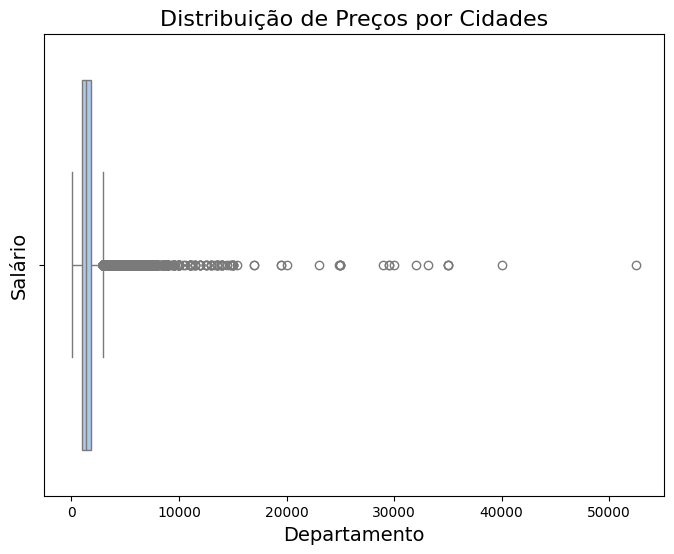

In [25]:
import seaborn as sns


plt.figure(figsize=(8, 6))  # Definir o tamanho da figura
sns.boxplot(x='price', data=dataset_1, palette='pastel')

plt.title('Distribuição de Preços por Cidades', fontsize=16)
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Salário', fontsize=14)

plt.show()

C:\Users\lucao\AppData\Local\Temp\ipykernel_3176\1666117577.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price', data=df_sem_outliers, palette='pastel')


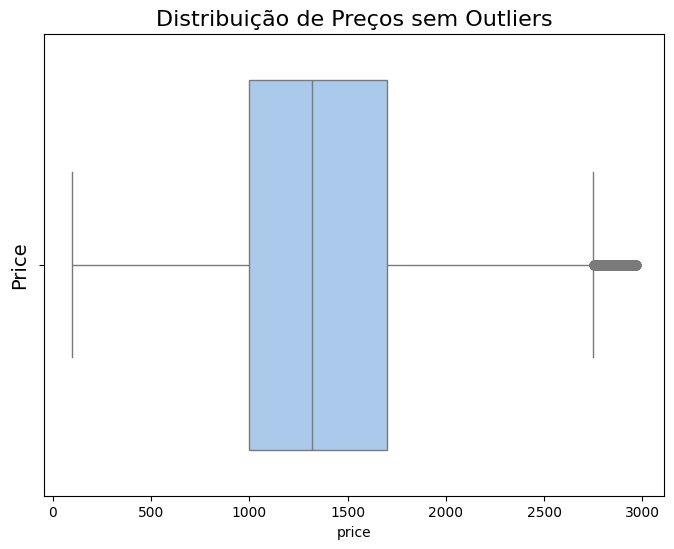

In [26]:

df = dataset_1
# Calcular Q1, Q3 e IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para remover outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados para remover outliers
df_sem_outliers = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]

# Criar o boxplot sem os outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df_sem_outliers, palette='pastel')

# Adicionar título e rótulos
plt.title('Distribuição de Preços sem Outliers', fontsize=16)
plt.ylabel('Price', fontsize=14)

# Exibir o gráfico
plt.show()

In [27]:
# Definindo uma função de adaptação
def adaptar(valor):
    return valor / 10.76 # Exemplo de fórmula: 2 * valor + 1

# Aplicando a função a todos os valores da coluna
df['square_m'] = df['square_feet'].apply(adaptar)

contagem = df.groupby('cityname').size()

# Encontrar o grupo com o maior número de valores
grupo_mais_valores = contagem.idxmax()
quantidade_mais_valores = contagem.max()

print(f"O grupo com mais valores é '{grupo_mais_valores}' com {quantidade_mais_valores} ocorrências.")

# Encontrar os três grupos com mais valores
top_grupos = contagem.nlargest(3)

# Exibir o resultado
print("Os grupos com mais valores são:")
print(top_grupos)

O grupo com mais valores é 'Dallas' com 2858 ocorrências.
Os grupos com mais valores são:
cityname
Dallas         2858
Denver         2755
Los Angeles    2433
dtype: int64


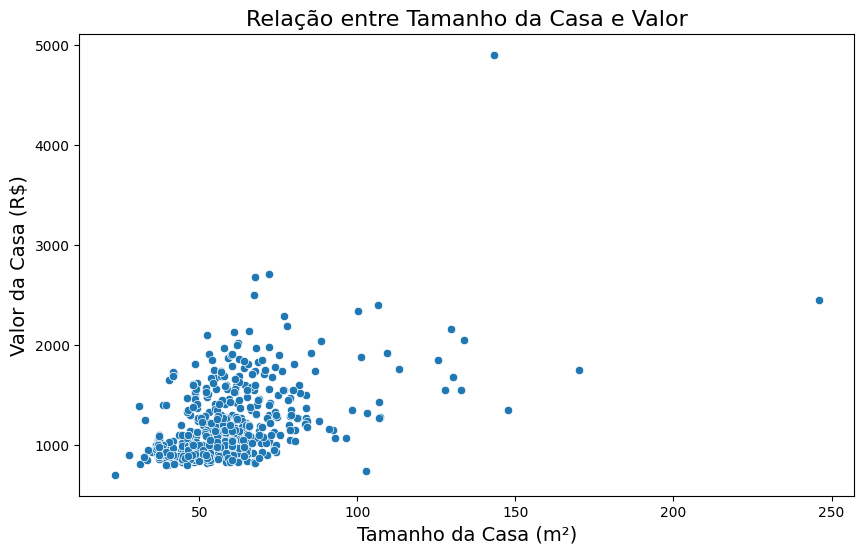

In [28]:
# Criar o scatter plot

df_a = df[df['cityname'] == 'Austin']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='square_m', y='price', data=df_a)

plt.title('Relação entre Tamanho da Casa e Valor', fontsize=16)
plt.xlabel('Tamanho da Casa (m²)', fontsize=14)
plt.ylabel('Valor da Casa (R$)', fontsize=14)

# Exibir o gráfico
plt.show()

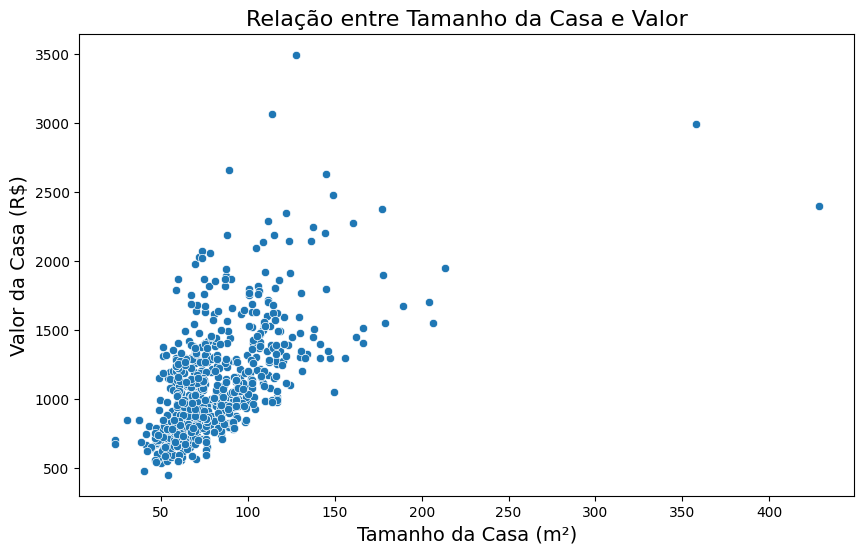

In [29]:
df_h = df[df['cityname'] == 'Houston']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='square_m', y='price', data=df_h)

plt.title('Relação entre Tamanho da Casa e Valor', fontsize=16)
plt.xlabel('Tamanho da Casa (m²)', fontsize=14)
plt.ylabel('Valor da Casa (R$)', fontsize=14)

# Exibir o gráfico
plt.show()

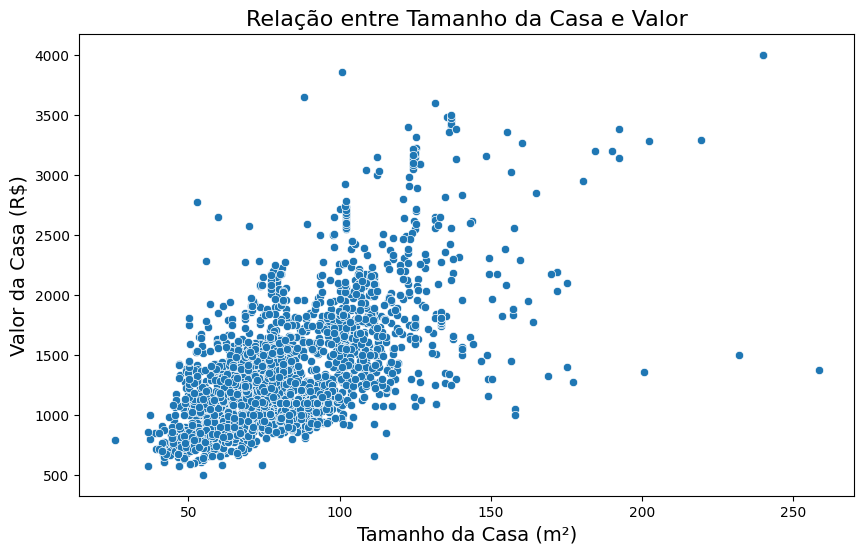

In [30]:
# Criar o scatter plot

df_n = df[df['cityname'] == 'Dallas']

df_n.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='square_m', y='price', data=df_n)

plt.title('Relação entre Tamanho da Casa e Valor', fontsize=16)
plt.xlabel('Tamanho da Casa (m²)', fontsize=14)
plt.ylabel('Valor da Casa (R$)', fontsize=14)

# Exibir o gráfico
plt.show()

In [31]:
df_na = df_n.groupby(['latitude', 'longitude'], as_index=False).agg(
    price=('price', 'sum'),
    quantidade=('price', 'size')  # Conta o número de elementos agrupados
)

df_na['media'] = df_na['price'] / df_na['quantidade']

df_na['media'].mean()

1243.9753903507499

In [32]:
import folium


mapa = folium.Map( location = [df_na['latitude'][0], df_na['longitude'][0]])

for i in range(len(df_na)):
    coordenada = [df_na['latitude'][i], df_na['longitude'][i] ]
    casa = f" $: {df_na['media'][i]} "
    if df_na['media'][i] > 1282:
        folium.Marker(coordenada, popup = casa).add_to(mapa)
    else:
        folium.Marker(coordenada, popup = casa, icon = folium.Icon(color = "red")).add_to(mapa)

mapa

In [33]:
df_aa = df_a.groupby(['latitude', 'longitude'], as_index=False).agg(
    price=('price', 'sum'),
    quantidade=('price', 'size')  # Conta o número de elementos agrupados
)

df_aa['media'] = df_aa['price'] / df_aa['quantidade']

valor_medio = df_aa['media'].mean()

mapa_a = folium.Map( location = [df_aa['latitude'][0], df_aa['longitude'][0]])

for i in range(len(df_aa)):
    coordenada_a = [df_aa['latitude'][i], df_aa['longitude'][i] ]
    casa_a = f" $: {df_aa['media'][i]} "
    if df_aa['media'][i] > valor_medio:
        folium.Marker(coordenada_a, popup = casa_a).add_to(mapa_a)
    else:
        folium.Marker(coordenada_a, popup = casa_a, icon = folium.Icon(color = "red")).add_to(mapa_a)

mapa_a

In [34]:
df_ha = df_h.groupby(['latitude', 'longitude'], as_index=False).agg(
    price=('price', 'sum'),
    quantidade=('price', 'size')  # Conta o número de elementos agrupados
)

df_ha['media'] = df_ha['price'] / df_ha['quantidade']

valor_medio = df_ha['media'].mean()

mapa_h = folium.Map( location = [df_ha['latitude'][0], df_ha['longitude'][0]])

for i in range(len(df_ha)):
    coordenada_h = [df_ha['latitude'][i], df_ha['longitude'][i] ]
    casa_h = f" $: {df_ha['media'][i]} "
    if df_ha['media'][i] > valor_medio:
        folium.Marker(coordenada_h, popup = casa_h).add_to(mapa_h)
    else:
        folium.Marker(coordenada_h, popup = casa_h, icon = folium.Icon(color = "red")).add_to(mapa_h)

mapa_h

In [49]:

df['amenitiess'] = df['amenities'].str.split(',')
df_explodido = df.explode('amenitiess')


# Agora, você pode agrupar e analisar o impacto dos objetos no preço
impacto_objetos = df_explodido.groupby('amenities')['price'].agg(['sum', 'mean', 'count']).reset_index()

# Renomear as colunas para maior clareza
impacto_objetos.columns = ['amenities', 'soma_preco', 'media_preco', 'quantidade']

In [50]:
media_impacto = impacto_objetos['media_preco'].mean()

impacto_objetos['ranking'] = impacto_objetos['media_preco'].rank(ascending=False)

impacto_objetos.sort_values(by='ranking', inplace=True)

print(impacto_objetos)

                                              amenities  soma_preco  \
1773  AC,Cable or Satellite,Internet Access,Patio/De...    262500.0   
6210  Clubhouse,Elevator,Fireplace,Gated,Gym,Parking...    320000.0   
8167                   Elevator,Hot Tub,Patio/Deck,Pool    140000.0   
8039           Elevator,Fireplace,Parking,Patio/Deck,TV    160000.0   
7232  Dishwasher,Elevator,Fireplace,Hot Tub,View,Was...    180000.0   
...                                                 ...         ...   
111   AC,Basketball,Cable or Satellite,Clubhouse,Dis...      4202.0   
702   AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...      3707.0   
2109  AC,Clubhouse,Dishwasher,Gym,Parking,Refrigerat...      4592.0   
7063  Clubhouse,Internet Access,Playground,Washer Dryer      3696.0   
5885    Cable or Satellite,Pool,Refrigerator,Storage,TV      1375.0   

      media_preco  quantidade  ranking  
1773      52500.0           5      1.0  
6210      40000.0           8      2.0  
8167      35000.0       

In [51]:
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Baixo', 'Médio', 'Alto'])

print(df[['price', 'price_category']].head(20))

     price price_category
0   2195.0           Alto
1   1250.0          Médio
2   1395.0          Médio
3   1600.0          Médio
4    975.0          Baixo
5   1250.0          Médio
6   1600.0          Médio
7   1300.0          Médio
8    795.0          Baixo
9   2150.0           Alto
10  1795.0           Alto
11  3195.0           Alto
12  2395.0           Alto
13  7800.0           Alto
14   720.0          Baixo
15  2000.0           Alto
16   729.0          Baixo
17  1045.0          Baixo
18  1800.0           Alto
19  1250.0          Médio


In [52]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())

df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean()) 

df['pets_allowed'] = df['pets_allowed'].fillna(df['pets_allowed'].mode()[0])

df['address'] = df['address'].fillna(df['address'].mode()[0])

df['cityname'] = df['cityname'].fillna(df['cityname'].mode()[0])

df['state'] = df['state'].fillna(df['state'].mode()[0])

df['latitude'] = df['latitude'].fillna(df['latitude'].mean()) 

df['longitude'] = df['longitude'].fillna(df['longitude'].mean()) 

df['price'] = df['price'].fillna(df['price'].mean()) 

df = df.drop('amenitiess', axis=1)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Features selecionadas
features = ['latitude', 'longitude', 'bedrooms', 'bathrooms', 'square_feet', 'has_photo']  # Customize conforme necessário
X = df[features]

# Label (target)
y = df['price_category']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando features numéricas
scaler = StandardScaler()
X_train[['latitude', 'longitude', 'square_feet']] = scaler.fit_transform(X_train[['latitude', 'longitude', 'square_feet']])
X_test[['latitude', 'longitude', 'square_feet']] = scaler.transform(X_test[['latitude', 'longitude', 'square_feet']])

# Convertendo variáveis categóricas (se houver)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Exibir colunas que têm valores NaN
print(df.columns[df.isna().any()])


Index(['amenities', 'price_display'], dtype='object')


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inicializando o modelo
model = RandomForestClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 300, random_state=42)
# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8197396854113272
              precision    recall  f1-score   support

        Alto       0.88      0.85      0.87      6597
       Baixo       0.84      0.86      0.85      6720
       Médio       0.74      0.75      0.75      6582

    accuracy                           0.82     19899
   macro avg       0.82      0.82      0.82     19899
weighted avg       0.82      0.82      0.82     19899



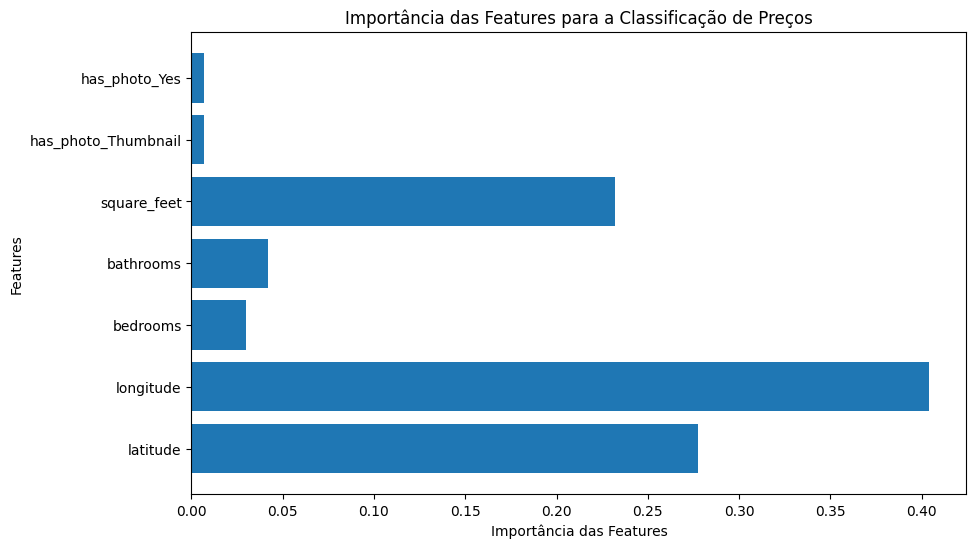

In [58]:
import matplotlib.pyplot as plt

# Importância das features
importances = model.feature_importances_
feature_names = X_train.columns

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features para a Classificação de Preços')
plt.show()


In [63]:
# Identificar colunas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Separar dados numéricos
X_num = df[num_cols]


from sklearn.preprocessing import StandardScaler

# Normalizar apenas colunas numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)



# Codificar variáveis categóricas
X_cat = pd.get_dummies(df.drop(columns=num_cols), drop_first=True)

# Combinar os dados normalizados com as colunas categóricas
import numpy as np

# Converter o array de dados numéricos normalizados de volta para DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=num_cols)

# Concatenar
X_final = pd.concat([X_scaled_df, X_cat.reset_index(drop=True)], axis=1)



MemoryError: Unable to allocate 8.76 GiB for an array with shape (99492, 94503) and data type bool

In [62]:
# Aplicar K-Means, por exemplo
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_final)

# Verificar os resultados
print(df[['cluster']].value_counts())


NameError: name 'X_final' is not defined

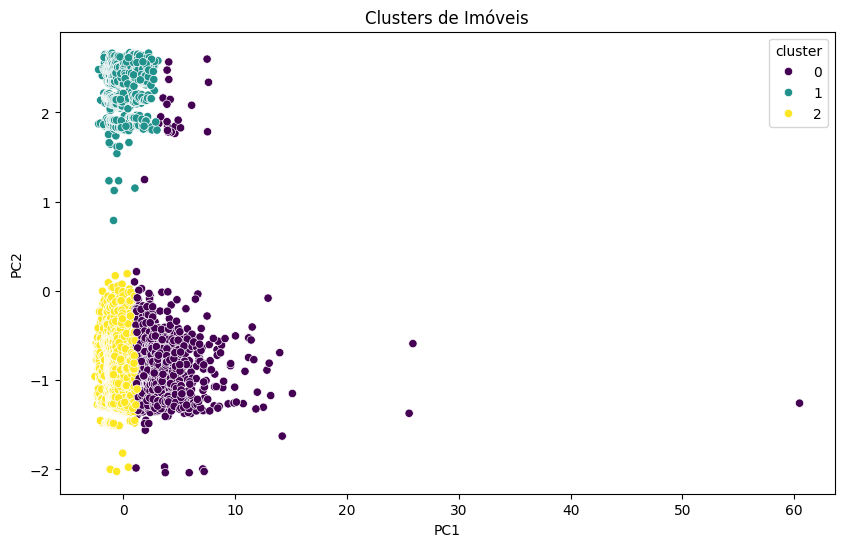

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar um DataFrame para visualização
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']

# Plotar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('Clusters de Imóveis')
plt.show()


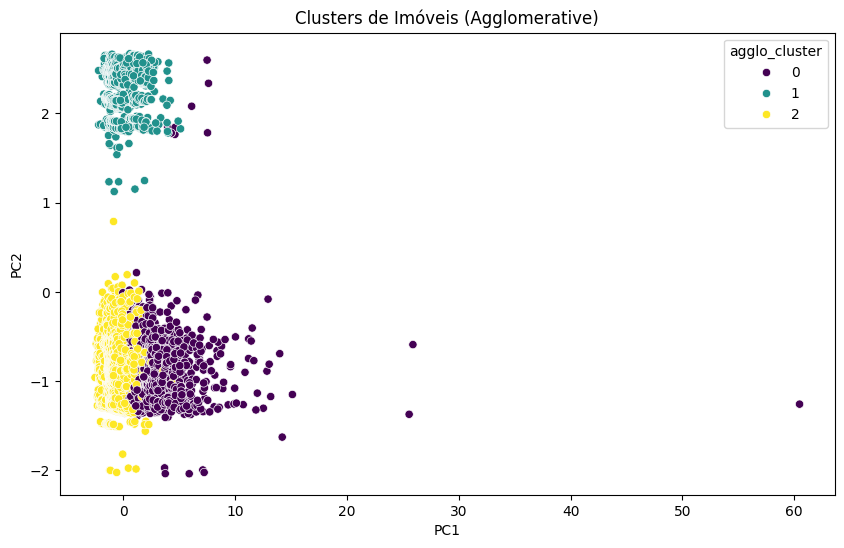

In [91]:
from sklearn.cluster import AgglomerativeClustering
# Passo 1: Aplicar Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
df['agglo_cluster'] = agglo.fit_predict(X_scaled)  # Certifique-se de que X_scaled está definido

# Passo 2: Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar um DataFrame para visualização com PC1, PC2 e o cluster
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['agglo_cluster'] = df['agglo_cluster'].values  # Adicionar a coluna de clusters

# Passo 3: Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='agglo_cluster', palette='viridis')
plt.title('Clusters de Imóveis (Agglomerative)')
plt.show()


C:\Users\lucao\AppData\Local\Temp\ipykernel_2324\2886340681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Preço Médio', data=cluster_price_mean, palette='viridis')


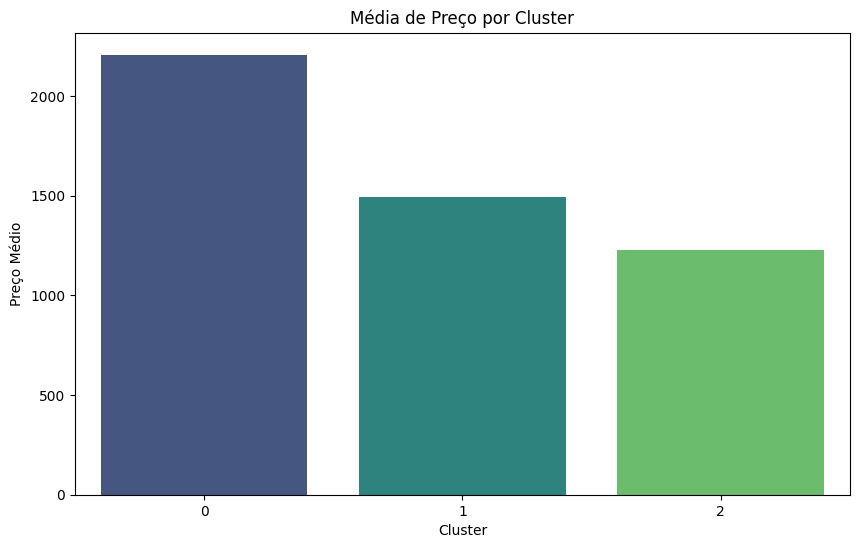

In [92]:
cluster_price_mean = df.groupby('agglo_cluster')['price'].mean().reset_index()

# Renomear a coluna para melhor entendimento
cluster_price_mean.columns = ['Cluster', 'Preço Médio']

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Preço Médio', data=cluster_price_mean, palette='viridis')
plt.title('Média de Preço por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Preço Médio')
plt.xticks(rotation=0)  # Para manter os rótulos dos clusters na horizontal
plt.show()

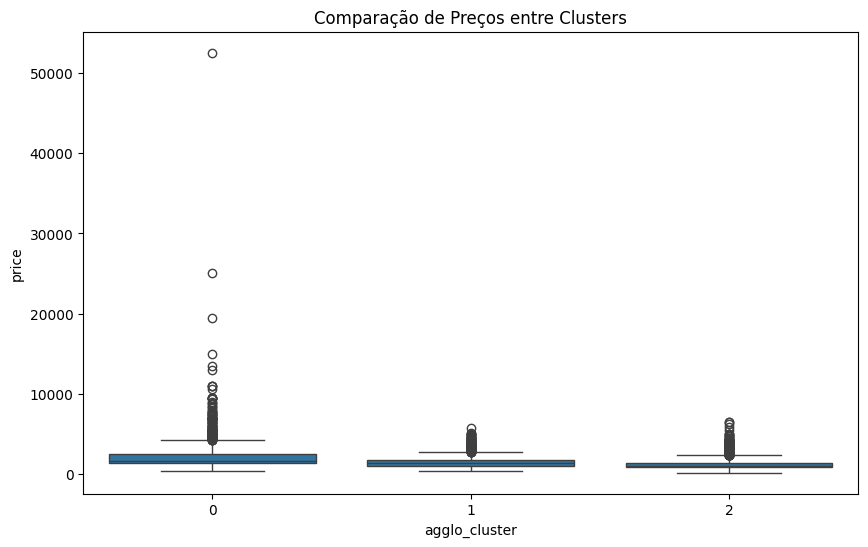

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo de boxplot para comparação de preços entre clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='agglo_cluster', y='price', data=df)
plt.title('Comparação de Preços entre Clusters')
plt.show()


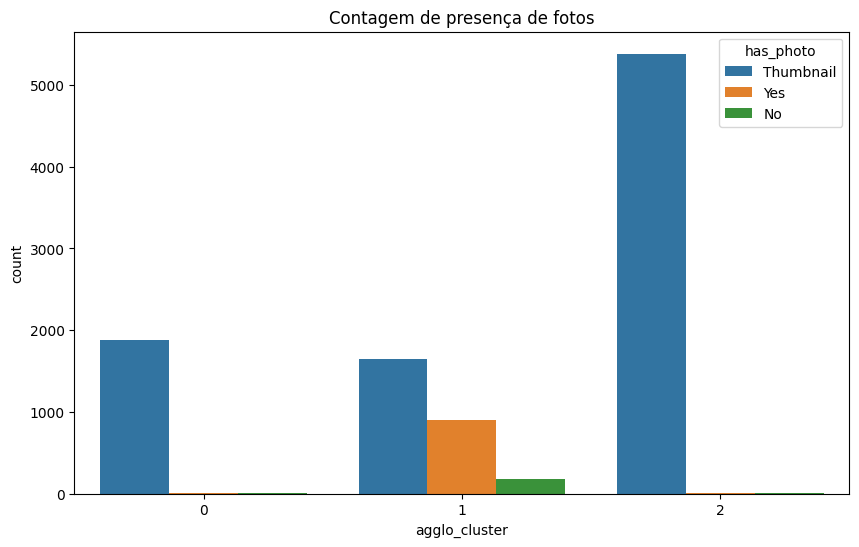

In [94]:
# Exemplo para visualizar a contagem de uma comodidade específica
plt.figure(figsize=(10, 6))
sns.countplot(x='agglo_cluster', hue='has_photo', data=df)
plt.title('Contagem de presença de fotos')
plt.show()


   agglo_cluster  Count
0              0    739
1              1   2506
2              2   3206


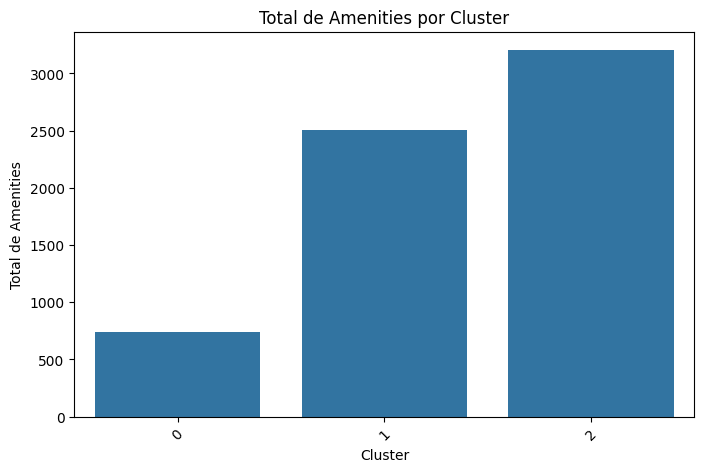

In [104]:
df['amenitiess'] = df['amenities'].str.split(',')

# Expandir a coluna de amenities
amenities_expanded = df.explode('amenities')

# Criar um DataFrame de presença de amenities, contando a ocorrência
amenities_count = amenities_expanded.groupby(['agglo_cluster', 'amenities']).size().reset_index(name='Count')

# Somar a contagem total de amenities por cluster
total_amenities_per_cluster = amenities_count.groupby('agglo_cluster')['Count'].sum().reset_index()

# Visualizando o DataFrame resultante
print(total_amenities_per_cluster)

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='agglo_cluster', y='Count', data=total_amenities_per_cluster)
plt.title('Total de Amenities por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total de Amenities')
plt.xticks(rotation=45)
plt.show()
